## Introdução

In [226]:
%pip install boto3
%pip install skimpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import uuid
from datetime import datetime
from dotenv import load_dotenv
import boto3
from skimpy import generate_test_data, skim

%matplotlib inline
sns.set(style="whitegrid")

"""
Importa todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para
redução de dimensionalidade e clustering.

Bibliotecas:
- pandas: Manipulação de dados
- numpy: Operações numéricas
- matplotlib: Visualização de dados
- seaborn: Visualização estatística
- os: Interação com o sistema operacional
- sklearn.decomposition.PCA: Análise de Componentes Principais
- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans
- sklearn.preprocessing.StandardScaler: Escalonamento de dados
- boto3: Interação com AWS S3
"""

'\nImporta todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para\nredução de dimensionalidade e clustering.\n\nBibliotecas:\n- pandas: Manipulação de dados\n- numpy: Operações numéricas\n- matplotlib: Visualização de dados\n- seaborn: Visualização estatística\n- os: Interação com o sistema operacional\n- sklearn.decomposition.PCA: Análise de Componentes Principais\n- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans\n- sklearn.preprocessing.StandardScaler: Escalonamento de dados\n- boto3: Interação com AWS S3\n'

In [228]:
"""importação das tabelas"""

import pandas as pd
import os
csv_file = 'TABELA_BIG_DATA_FT_OCORRENCIAS.csv'
df = pd.read_csv(os.path.join("..", "dados", csv_file), encoding="utf-16le")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_28924\1822088088.py:6: DtypeWarning: Columns (0,3,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join("..", "dados", csv_file), encoding="utf-16le")


## Análise exploratória diagnóstica

In [229]:
"""visualização inicial"""
df

,Class Manchete,Classificacao Manchete,Data Atualizacao,Data Normalizacao,Desc Ocorrencia,Eventos Relacionados,Fl Estimados,Flag Controle,Hora Ocorrencia,Id Datanormalizacao,...,Id Tipo Relevancia,Manchete,Nr Acoes,Pass Estimados,Sic Id Ocorrencia,Sic Id Ocorrencia 3,Total Ajustes,Trecho,Tx Tipo Relevancia,Tx Trem
0,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,26/05/2010 05:30:00,DEVIDO QUEDA DE ENERGIA NA ESTAÇÃO ARACARÉ ENT...,NaN,0,NÃO,"0,145833",20100528.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,23112,2,0,ARC,NaN,NaN
1,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,29/05/2010 16:30:00,DEVIDO A AVARIA DE BLOQUEIOS TOTAL DAS 15:10 H...,NaN,0,NÃO,"0,631944",20100614.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,23629,2,0,CVN,NaN,NaN
2,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,13/07/2010 23:55:00,DEVIDO A AVARIA DE BLOQUEIOS TOTAL DAS 11:30 H...,NaN,0,NÃO,"0,479167",20100729.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,30461,2,0,ARC,NaN,NaN
3,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,20/07/2010 19:30:00,CONFORME INFORMADO PELO SR. ENCARREGADO DE EST...,NaN,0,NÃO,"0,811806",20100805.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,31628,3,0,ILE,NaN,NaN
4,AGENTES EXTERNOS À EMPRESA,AGENTES EXTERNOS À EMPRESA,NaN,30/08/2010 04:58:00,DEVIDO FALTA DE ENERGIA DA CONCESSIONÁRIA AES...,NaN,0,NÃO,"0,206944",20100915.0,...,NaN,MANCHETE CÓDIGO 00013,NaN,0,38474,2,0,EGO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715106,NaN,TREM DE CARGA,NaN,NaN,VIDE SICOM - 17687 / 2022 - .TREM DA MRS PREF...,NaN,0,NÃO,"0,388889",NaN,...,-1.0,MANCHETE CÓDIGO 00219,0.0,0,17691,1,0,BAS,NaN,NaN
715107,NaN,TREM DE CARGA,NaN,NaN,VIDE SICOM 11879/2023 - TREM DA MRS PREFIXO WD...,NaN,0,NÃO,"0,429167",NaN,...,-1.0,MANCHETE CÓDIGO 00219,0.0,0,11882,1,0,BAS,NaN,NaN
715108,NaN,TREM DE CARGA,NaN,NaN,VIDE SICOM 1574/2023TREM DA MRS PREFIXO KMP211...,NaN,0,NÃO,"0,505556",NaN,...,-1.0,MANCHETE CÓDIGO 00219,0.0,0,1572,1,0,BAS,NaN,NaN
715109,NaN,TREM DE CARGA,NaN,NaN,VIDE SICOM 9748/2022 - SAF 25120/2022 - CONTIN...,NaN,0,NÃO,"0,166667",NaN,...,-1.0,MANCHETE CÓDIGO 00221,0.0,0,9803,1,0,RPI,NaN,NaN


In [230]:
"""informações iniciais da tabela"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715111 entries, 0 to 715110
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Class Manchete          598051 non-null  object 
 1   Classificacao Manchete  715111 non-null  object 
 2   Data Atualizacao        0 non-null       float64
 3   Data Normalizacao       241109 non-null  object 
 4   Desc Ocorrencia         714982 non-null  object 
 5   Eventos Relacionados    0 non-null       float64
 6   Fl Estimados            715111 non-null  int64  
 7   Flag Controle           715111 non-null  object 
 8   Hora Ocorrencia         715111 non-null  object 
 9   Id Datanormalizacao     596637 non-null  float64
 10  Id Dataocorrencia       715111 non-null  int64  
 11  Id Localidade           715111 non-null  int64  
 12  Id Sic Classificacao    715111 non-null  int64  
 13  Id Tipo Relevancia      316350 non-null  float64
 14  Manchete            

In [231]:
"""análise descritiva das colunas numericas"""
df.describe()

,Data Atualizacao,Eventos Relacionados,Fl Estimados,Id Datanormalizacao,Id Dataocorrencia,Id Localidade,Id Sic Classificacao,Id Tipo Relevancia,Nr Acoes,Pass Estimados,Sic Id Ocorrencia,Sic Id Ocorrencia 3,Total Ajustes,Tx Trem
count,0.0,0.0,715111.000000,5.966370e+05,7.151110e+05,715111.000000,715111.000000,316350.000000,316420.000000,715111.000000,715111.000000,715111.000000,715111.0,0.0
mean,NaN,NaN,0.000313,2.010884e+07,2.012084e+07,248.608044,4.282331,-0.999940,0.000066,0.394490,24865.187336,1.981701,0.0,NaN
std,NaN,NaN,0.017696,5.015635e+04,5.491824e+04,163.171818,1.227361,0.017511,0.008146,54.165603,20295.795615,0.765072,0.0,NaN
min,NaN,NaN,0.000000,2.000012e+07,2.000041e+07,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.0,NaN
25%,NaN,NaN,0.000000,2.007080e+07,2.008080e+07,108.000000,3.000000,-1.000000,0.000000,0.000000,6891.000000,1.000000,0.0,NaN
50%,NaN,NaN,0.000000,2.011072e+07,2.012122e+07,224.000000,5.000000,-1.000000,0.000000,0.000000,18797.000000,2.000000,0.0,NaN
75%,NaN,NaN,0.000000,2.015111e+07,2.017013e+07,390.000000,5.000000,-1.000000,0.000000,0.000000,41932.000000,3.000000,0.0,NaN
max,NaN,NaN,1.000000,2.023111e+07,2.023121e+07,815.000000,9.000000,5.000000,1.000000,25695.000000,75109.000000,3.000000,0.0,NaN


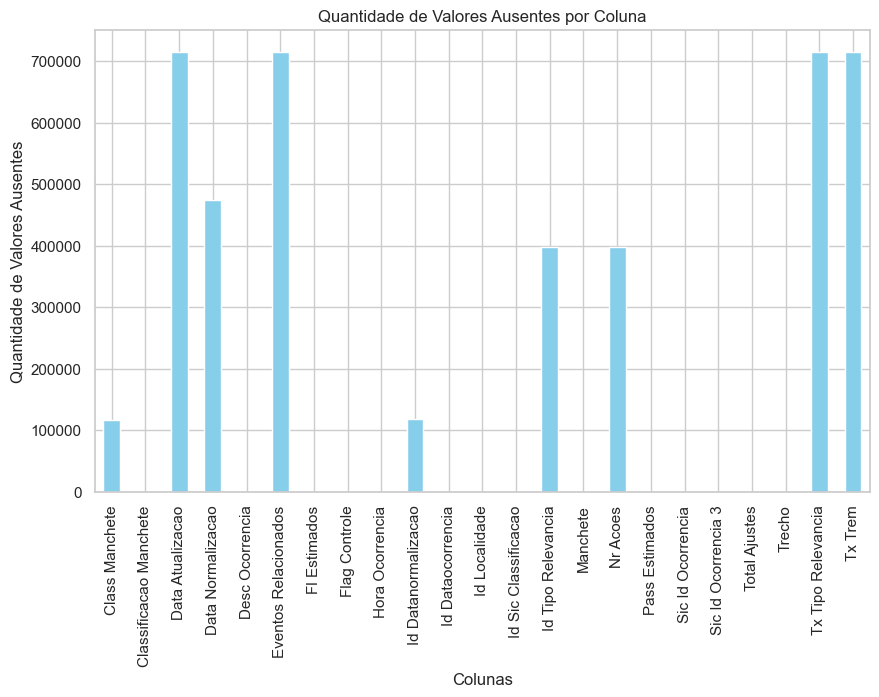

In [232]:
"""análise de valores ausentes na tabela por meio de um gráfico de barras"""

valores_ausentes = df.isnull().sum()

plt.figure(figsize=(10, 6))
valores_ausentes.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Ausentes')
plt.show()

In [233]:
"""análise de diferenças entre as colunas 'Class Manchete' e 'Classificação Manchete'"""

diferencas_classes_manchete = (df['Class Manchete'] != df['Classificacao Manchete']).sum()
print(diferencas_classes_manchete)

"""o objetivo dessa análise é saber se as colunas possuem valores identicos ou não"""

117060


'o objetivo dessa análise é saber se as colunas possuem valores identicos ou não'

## Limpeza dos dados

In [234]:
"""retirada das colunas que não possuem dados""" 

df = df.drop(['Data Atualizacao', 'Eventos Relacionados', 'Tx Tipo Relevancia', 'Tx Trem'], axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715111 entries, 0 to 715110
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Class Manchete          598051 non-null  object 
 1   Classificacao Manchete  715111 non-null  object 
 2   Data Normalizacao       241109 non-null  object 
 3   Desc Ocorrencia         714982 non-null  object 
 4   Fl Estimados            715111 non-null  int64  
 5   Flag Controle           715111 non-null  object 
 6   Hora Ocorrencia         715111 non-null  object 
 7   Id Datanormalizacao     596637 non-null  float64
 8   Id Dataocorrencia       715111 non-null  int64  
 9   Id Localidade           715111 non-null  int64  
 10  Id Sic Classificacao    715111 non-null  int64  
 11  Id Tipo Relevancia      316350 non-null  float64
 12  Manchete                715111 non-null  object 
 13  Nr Acoes                316420 non-null  float64
 14  Pass Estimados      

In [235]:
"""retirada de linhas duplicadas"""

df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715111 entries, 0 to 715110
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Class Manchete          598051 non-null  object 
 1   Classificacao Manchete  715111 non-null  object 
 2   Data Normalizacao       241109 non-null  object 
 3   Desc Ocorrencia         714982 non-null  object 
 4   Fl Estimados            715111 non-null  int64  
 5   Flag Controle           715111 non-null  object 
 6   Hora Ocorrencia         715111 non-null  object 
 7   Id Datanormalizacao     596637 non-null  float64
 8   Id Dataocorrencia       715111 non-null  int64  
 9   Id Localidade           715111 non-null  int64  
 10  Id Sic Classificacao    715111 non-null  int64  
 11  Id Tipo Relevancia      316350 non-null  float64
 12  Manchete                715111 non-null  object 
 13  Nr Acoes                316420 non-null  float64
 14  Pass Estimados      

In [236]:
"""preenchimento da coluna 'Pass Estimados' com a média dela"""

df['Pass Estimados'] = df['Pass Estimados'].fillna(df['Pass Estimados'].mean()) 

In [237]:
"""análise geral da tabela"""

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 715111 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 19     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_ ┃        ┃       ┃         ┃          ┃         ┃          ┃         ┃          ┃         ┃        ┃  │
│ ┃ name    ┃ NA     ┃ NA %  ┃ mean    ┃ sd       ┃ p0      ┃ p25      ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Fl      │      0 │     0 │ 0.00031 │   0.0177 │       0 │        0 │       0 │        0 │       1 │   ▇    │  │
│ │ Estimad │        │       │      32 │          │         │          │         │          │         │        │  │
│ │ os      │        │       │         │          │         │          │         │          │         │        │  │
│ │ Id      │ 118474 │ 16.57 │ 2011000 │    50160 │ 2000000 │ 20070000 │ 2011000 │ 20150000 │ 2023000 │ ▃▅▇▇▇  │  │
│ │ Datanor │        │       │       0 │          │       0 │          │       0 │          │       0 │        │  │
│ │ malizac │        │       │         │          │         │          │         │          │         │        │  │
│ │ ao      │        │       │         │          │         │          │         │          │         │        │  │
│ │ Id      │      0 │     0 │ 2012000 │    54920 │ 2000000 │ 20080000 │ 2012000 │ 20170000 │ 2023000 │ ▂▃▆▆▇▁ │  │
│ │ Dataoco │        │       │       0 │          │       0 │          │       0 │          │       0 │        │  │
│ │ rrencia │        │       │         │          │         │          │         │          │         │        │  │
│ │ Id      │      0 │     0 │   248.6 │    163.2 │       1 │      108 │     224 │      390 │     815 │  ▇▆▆▅  │  │
│ │ Localid │        │       │         │          │         │          │         │          │         │        │  │
│ │ ade     │        │       │         │          │         │          │         │          │         │        │  │
│ │ Id Sic  │      0 │     0 │   4.282 │    1.227 │       1 │        3 │       5 │        5 │       9 │   ▆ ▇  │  │
│ │ Classif │        │       │         │          │         │          │         │          │         │        │  │
│ │ icacao  │        │       │         │          │         │          │         │          │         │        │  │
│ │ Id Tipo │ 398761 │ 55.76 │ -0.9999 │  0.01751 │      -1 │       -1 │      -1 │       -1 │       5 │   ▇    │  │
│ │ Relevan │        │       │         │          │         │          │         │          │         │        │  │
│ │ cia     │        │       │         │          │         │          │         │          │         │        │  │
│ │ Nr      │ 398691 │ 55.75 │ 6.637e- │ 0.008146 │       0 │        0 │       0 │        0 │       1 │   ▇    │  │
│ │ Acoes   │        │       │      05 │          │     

## Análise exploratória conclusiva

In [238]:
"""filtragem das colunas mais interessates e mais faceis de tirar conclusões e visualização delas"""

colunas_interessantes = df[['Sic Id Ocorrencia', 'Id Dataocorrencia', 'Trecho']]
colunas_interessantes.head()

,Sic Id Ocorrencia,Id Dataocorrencia,Trecho
0,23112,20100525,ARC
1,23629,20100529,CVN
2,30461,20100713,ARC
3,31628,20100720,ILE
4,38474,20100830,EGO


In [239]:
"""
observação das informações das colunas chamadas 'colunas_interessantes' 
para entender se alguma delas teria que ser tratada para a análise conclusiva.

"""

colunas_interessantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715111 entries, 0 to 715110
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Sic Id Ocorrencia  715111 non-null  int64 
 1   Id Dataocorrencia  715111 non-null  int64 
 2   Trecho             715111 non-null  object
dtypes: int64(2), object(1)
memory usage: 16.4+ MB


C:\Users\Inteli\AppData\Local\Temp\ipykernel_28924\1370229190.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_interessantes['Id Dataocorrencia'] = pd.to_datetime(df['Id Dataocorrencia'], format='%Y%m%d')
C:\Users\Inteli\AppData\Local\Temp\ipykernel_28924\1370229190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_interessantes['mes'] = colunas_interessantes['Id Dataocorrencia'].dt.month


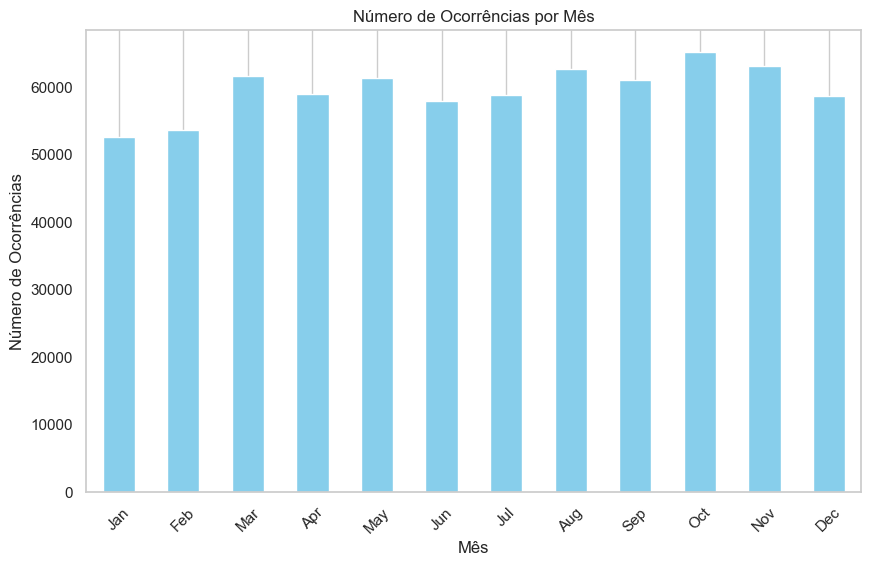

In [240]:
""" 
Conversão da coluna 'Id Dataocorrencia' para data no formata AAAA/MM/DD, 
separação dos meses encontrados em uma nova coluna chamada 'mes', contagem das ocorrencias com base nos meses do ano e 
plotagem de um gráfico com a distribuição de ocorrencias no ano para entender se existia algum mês outlier.

"""

colunas_interessantes['Id Dataocorrencia'] = pd.to_datetime(df['Id Dataocorrencia'], format='%Y%m%d')
colunas_interessantes['mes'] = colunas_interessantes['Id Dataocorrencia'].dt.month
contagem_mensal = colunas_interessantes['mes'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
contagem_mensal.plot(kind='bar', color='skyblue')
plt.title('Número de Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Ocorrências')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()

In [241]:
""" 
Entendimento de padrões na coluna 'Trecho' 
"""

frequencias = colunas_interessantes['Trecho'].value_counts()
print(frequencias)

Trecho
BAS        73730
TAT        45750
GUA        42522
BFU        41175
LUZ        35135
           ...  
PIN/REB        2
JOD/SAM        2
MLK            1
PIN/HRB        1
GJT/JOD        1
Name: count, Length: 244, dtype: int64


In [242]:
""" 
Transformação das categorias encontradas na coluna 'Trecho' em numeros para facilitar a análise
"""

colunas_interessantes['Trecho'] = colunas_interessantes['Trecho'].astype('category').cat.codes
print(colunas_interessantes)

        Sic Id Ocorrencia Id Dataocorrencia  Trecho  mes
0                   23112        2010-05-25      13    5
1                   23629        2010-05-29      55    5
2                   30461        2010-07-13      13    7
3                   31628        2010-07-20     101    7
4                   38474        2010-08-30      64    8
...                   ...               ...     ...  ...
715106              17691        2022-10-30      17   10
715107              11882        2023-07-28      17    7
715108               1572        2023-02-06      17    2
715109               9803        2022-06-20     200    6
715110              21893        2011-04-12     142    4

[715111 rows x 4 columns]


C:\Users\Inteli\AppData\Local\Temp\ipykernel_28924\1920553592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_interessantes['Trecho'] = colunas_interessantes['Trecho'].astype('category').cat.codes


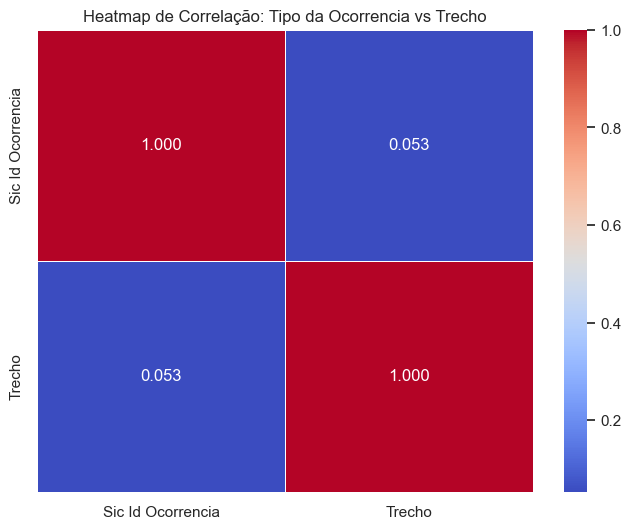

In [243]:
""" 
Matriz de correlação entre as colunas de ocorrencia e trecho - feito para saber qual é a influência de um no outro, ou seja
se tipos de ocorrencias acontecem em trechos espeficos.

"""

correlacao = colunas_interessantes[['Sic Id Ocorrencia', 'Trecho']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap de Correlação: Tipo da Ocorrencia vs Trecho')
plt.show()


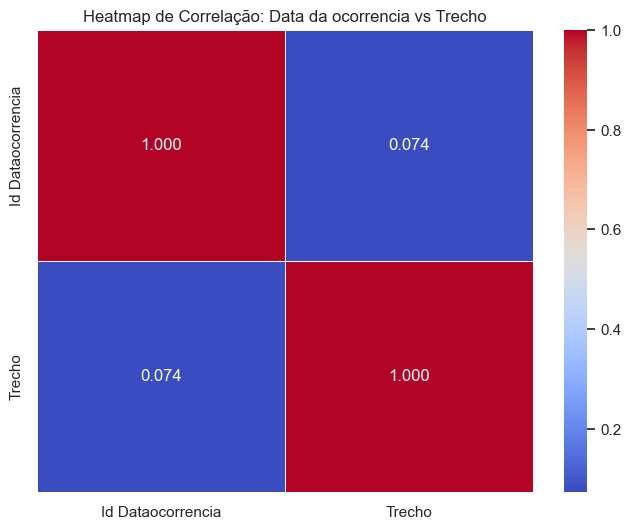

In [244]:
""" 
Matriz de correlação entre as colunas de data e trecho - feito para entender se algum trecho tem mais ocorrencias em 
datas especificas do ano.

"""

correlacao = colunas_interessantes[['Id Dataocorrencia', 'Trecho']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap de Correlação: Data da ocorrencia vs Trecho')
plt.show()

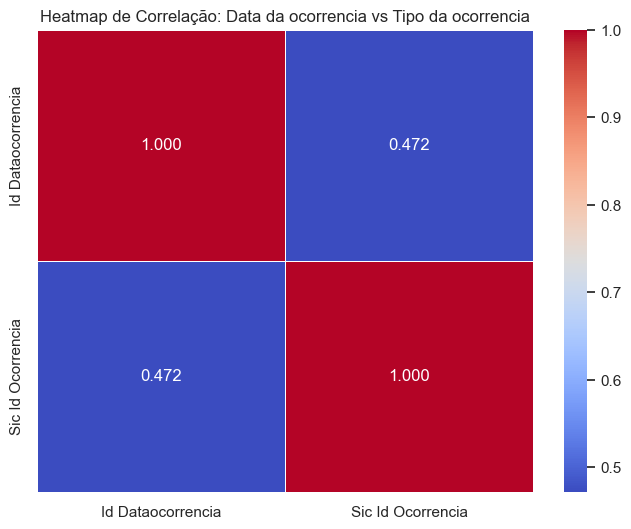

In [245]:
""" 
Matriz de correlação entre as colunas de data e tipo de ocorrencia - feito para entender se tipos de ocorrencias acontecem
em datas especificas.

"""

correlacao = colunas_interessantes[['Id Dataocorrencia', 'Sic Id Ocorrencia']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap de Correlação: Data da ocorrencia vs Tipo da ocorrencia')
plt.show()

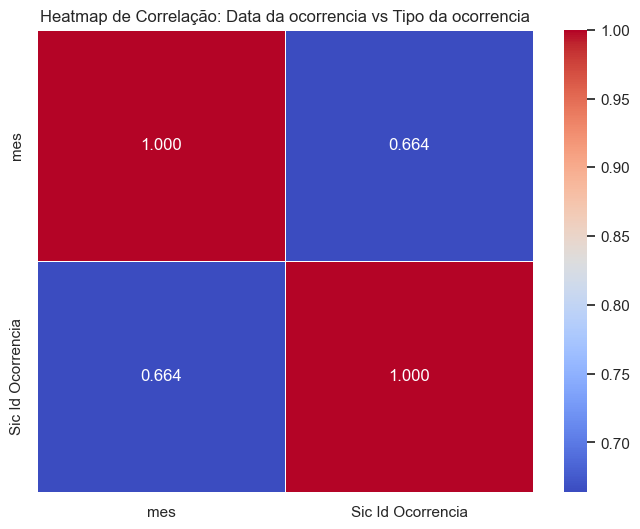

In [246]:
""" 
Matriz de correlação entre as colunas de mes e tipo de ocorrencia - seguindo a matriz acima, foi feito para entender
se meses especificos do ano possuem mais ocorrencias especificas.

"""

correlacao = colunas_interessantes[['mes', 'Sic Id Ocorrencia']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap de Correlação: Data da ocorrencia vs Tipo da ocorrencia')
plt.show()

In [247]:
""" 
Entendimento de padrões na coluna 'Sic Id Ocorrencia' 
"""

frequencias = colunas_interessantes['Sic Id Ocorrencia'].value_counts()
print(frequencias)

Sic Id Ocorrencia
5005     37
3446     36
2865     36
2101     36
4623     35
         ..
72522     1
72525     1
72520     1
72524     1
67729     1
Name: count, Length: 73705, dtype: int64


In [248]:
""" Filtro das colunas para entender melhor a correlação entre elas"""

ocorrencias_mes = colunas_interessantes[['mes', 'Sic Id Ocorrencia']]
ocorrencias_mes

,mes,Sic Id Ocorrencia
0,5,23112
1,5,23629
2,7,30461
3,7,31628
4,8,38474
...,...,...
715106,10,17691
715107,7,11882
715108,2,1572
715109,6,9803


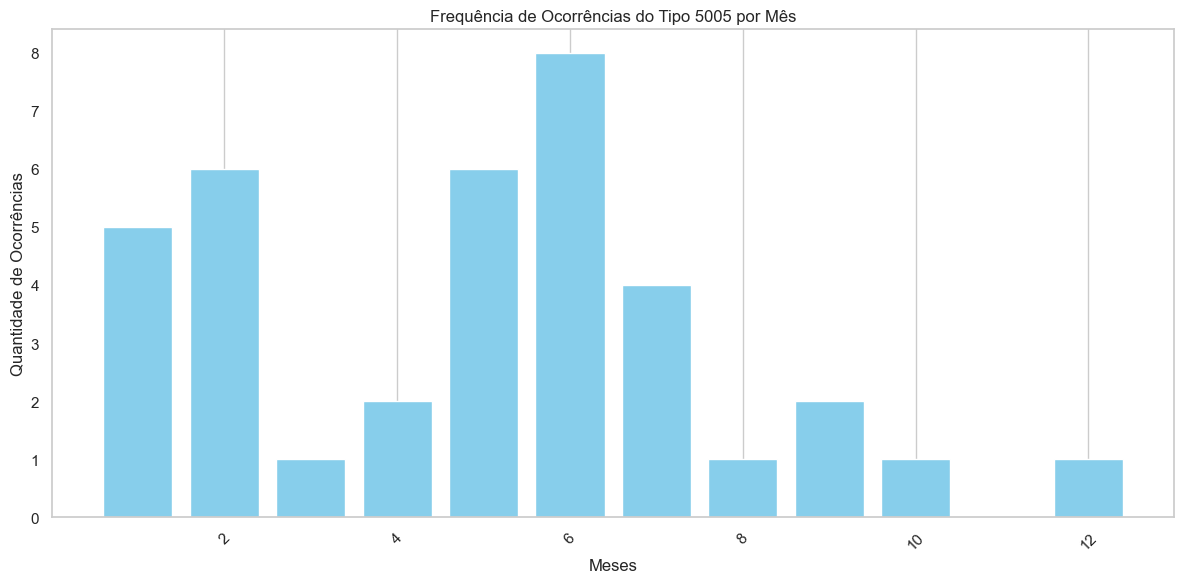

In [249]:
""" Grafico de barras da frequencia de um tipo de ocorrencia especifico '5005'
ao longo dos meses para suportar a hipótese"""

ocorrencias_5005 = ocorrencias_mes[ocorrencias_mes['Sic Id Ocorrencia'] == 5005]
contagem_por_mes = ocorrencias_5005['mes'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(contagem_por_mes.index, contagem_por_mes.values, color='skyblue')
plt.title('Frequência de Ocorrências do Tipo 5005 por Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


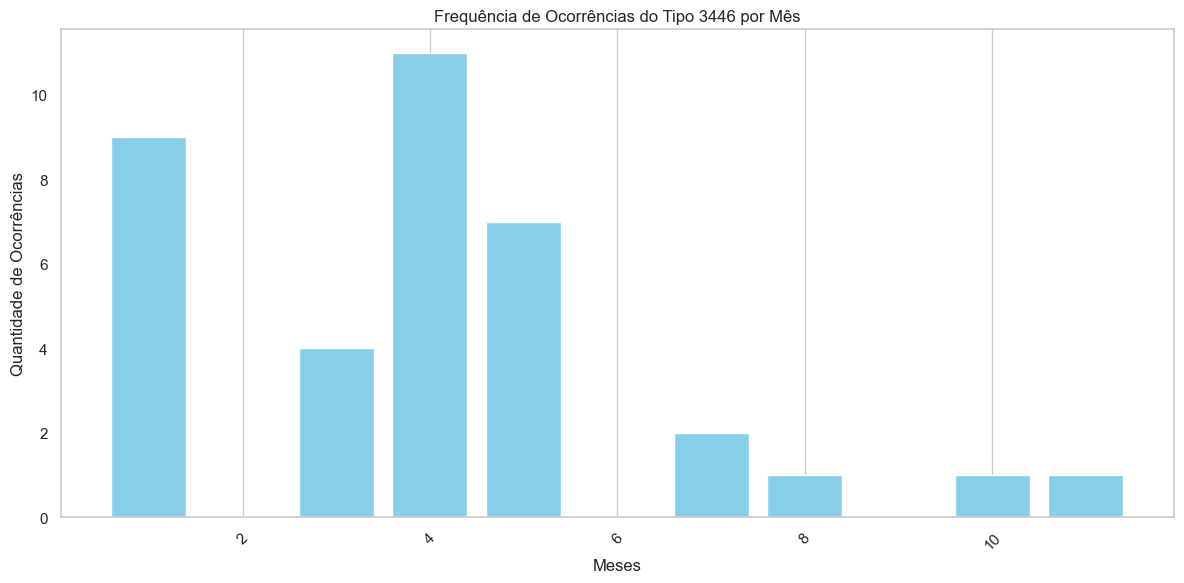

In [250]:
""" Grafico de barras da frequencia de um tipo de ocorrencia especifico '3446'
ao longo dos meses para suportar a hipótese"""

ocorrencias_3446 = ocorrencias_mes[ocorrencias_mes['Sic Id Ocorrencia'] == 3446]
contagem_por_mes = ocorrencias_3446['mes'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(contagem_por_mes.index, contagem_por_mes.values, color='skyblue')
plt.title('Frequência de Ocorrências do Tipo 3446 por Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusão

### Descobertas

- **Descoberta 1:** A CPTM possui um número de ocorrências mensal equilibrado. 
 
- **Descoberta 2:** A classe e classificação da manchete são de fato duas informações diferentes

- **Descoberta 3:** A correlação entre o tipo de ocorrência e o trecho é baixa, ou seja, provavelmente não existe um problema histórico recorrente em um trecho específico.

### Hipótese

É provável que certos tipos de ocorrências apresentem maior frequência em meses específicos ao longo do ano. Essa hipótese é suportada pela análise da matriz de correlação e pelos gráficos, que evidenciam a variação na frequência das ocorrências ao longo do ano. Por exemplo, a ocorrência de tipo 5005 atinge seu pico em junho, enquanto a ocorrência de tipo 3446 é mais frequente em abril.

## Exportação dos Dados

In [251]:
DATA_DIR = r'C:\Users\Inteli\Downloads\CPTM\dados_cptm'
csv_file = "TABELA_BIG_DATA_FT_OCORRENCIAS.csv"

def salvar_df_como_parquet(df, file_name, data_dir):
    """
    Salva um DataFrame processado em formato Parquet.

    Args:
        df (pd.DataFrame): DataFrame com os dados processados a serem salvos.
        file_name (str): Nome do arquivo Parquet (sem extensão).
        data_dir (str): Diretório onde o arquivo Parquet será salvo.

    Returns:
        str: Caminho completo do arquivo Parquet salvo.
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("O argumento 'df' deve ser um DataFrame do pandas.")
    
    if not isinstance(data_dir, str):
        raise ValueError("O argumento 'data_dir' deve ser uma string representando um diretório.")
    
    processed_data_dir = os.path.join(data_dir, 'processed')
    os.makedirs(processed_data_dir, exist_ok=True)

    parquet_path = os.path.join(processed_data_dir, f"{file_name}.parquet")

    try:
        df.to_parquet(parquet_path, index=False)
        print(f"Dados processados salvos em: {parquet_path}")
    except Exception as e:
        print(f"Ocorreu um erro ao salvar o DataFrame: {e}")
        return None

    return parquet_path

salvar_df_como_parquet(df, "ocorrencias", DATA_DIR)

Dados processados salvos em: C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed\ocorrencias.parquet


'C:\\Users\\Inteli\\Downloads\\CPTM\\dados_cptm\\processed\\ocorrencias.parquet'

In [252]:
load_dotenv()

aws_access_key = 
aws_secret_access_key = 
aws_session_token =
aws_region_name =

In [253]:
s3 = boto3.client('s3',
                  aws_access_key_id=,
                  aws_secret_access_key=,
                  aws_session_token=,
                  region_name= )

bucket_name = f"perola-negra"  

try:
    if aws_region_name == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    else:
        s3.create_bucket(Bucket=bucket_name,
                         CreateBucketConfiguration={'LocationConstraint': aws_region_name})
    
    print(f"Bucket '{bucket_name}' criado com sucesso.")
except s3.exceptions.BucketAlreadyOwnedByYou:
    print(f"Bucket '{bucket_name}' já existe e é de sua propriedade.")
except Exception as e:
    print(f"Erro ao criar bucket: {e}")

Bucket 'perola-negra' criado com sucesso.


In [254]:
def upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, data_dir):
    """
    Faz o upload de um arquivo Parquet específico para uma subpasta em um bucket S3.

    Args:
        parquet_file_name (str): Nome do arquivo Parquet a ser enviado (sem extensão .parquet).
        bucket_name (str): Nome do bucket S3.
        subpasta (str): Nome da subpasta dentro do bucket S3.
        data_dir (str): Diretório local onde o arquivo Parquet está salvo.

    Returns:
        None
    """
    parquet_local = os.path.join(data_dir, f"{parquet_file_name}.parquet")

    s3_key = f"{subpasta}/{parquet_file_name}.parquet"

    try:
        # Enviar o arquivo para o bucket S3 na subpasta especificada
        s3.upload_file(parquet_local, bucket_name, s3_key)
        print(f"Arquivo '{parquet_local}' enviado para '{s3_key}' no bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Erro ao enviar arquivo para S3: {e}")

PROCESSED_DATA_DIR = r'C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed'


# Definir nome do bucket e subpasta
bucket_name = 'perola-negra'
subpasta = 'ocorrencias-falhas'
parquet_file_name = 'ocorrencias'

upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, PROCESSED_DATA_DIR)

Arquivo 'C:\Users\Inteli\Downloads\CPTM\dados_cptm\processed\ocorrencias.parquet' enviado para 'ocorrencias-falhas/ocorrencias.parquet' no bucket 'perola-negra'.
